PThread == POSIX thread


POSIX == Portable Operating System Interface

POSIX threads:
1. POSIX versions of Birrell's API
1. specifies syntax and semantics of the operations


In [10]:
#include <pthread.h>
void foo(){
    printf("Foo\n");
}

In [ ]:
pthread_t pid;

if(pthread_create(&pid, NULL, &foo, NULL)<0) {
    printf("Failure to create thread");
} 


In [ ]:
int pthread_create(pthread_t *thread, const pthread_attr_t *attr, void*(*start_routine)(void *), void *arg);


In [ ]:
int pthread_join(pthread_t thread, void **status)

### Pthrea attributes:
pthread_attr_t:
1. specified in pthread_create
1. defines features of the new thread
    1. stack size 
    1. inheritance
    1. joinable
    1. scheduling policy
    1. priority
    1. system/process scope
1. has default behavior with NULL in the pthread_create
 

In [ ]:
int pthread_attr_init(pthread_attr_t *attr);
int pthread_attr_destroty(pthread_attr_t *attr);
pthread_attr_{set/get}{attributre};



### Detaching pthread
default: joinable thread.
    
If joinable, if a thread's parent thread ends, the thread becomes zombie thread. When detached, the child thread can't be joined. Even if parent exits, detached threads are free to continue their execution. 


In [ ]:
int pthread_detach(); //https://man7.org/linux/man-pages/man3/pthread_detach.3.html
//or
int pthread_attr_setdetachstate(pthread_attr_t *attr, int detachstate); //https://man7.org/linux/man-pages/man3/pthread_attr_setdetachstate.3.html

In [ ]:
//example
#include <studio.h>
#include <pthread.h> // pthread header file
#define N_THREAD 4


void *foo(void *arg) {
    printf("Foo\n");
    pthread_exit(NULL);
}


void *threadFunc(void *arg) {
    int *p = (int *) arg;
    int n = *p;
    printf("Thread number %d\n", n);
    return 0;
}


int main(void){
    int i;
    pthread_t tid:
    pthread_attr_t attr;
    pthread_attr_init(&attr);
    pthread_attr_setdetachstate(&attr, PTHREAD_CREATE_DETACHED);
    pthread_attr_setscope(&attr, PTHREAD_SCOPE_SYSTEM);
    pthread_create(NULL, &attr, foo, NULL);
    
    //int tNum[N_THREAD]; ...
    
    for(i =0; i< N_THREAD; i++) {
        pthread_create(&tid[i], NULL, threadFunc, &i));
        //pthread_create(&tid[i], NULL, threadFunc, &tNum[i])
    }
    for(int =0; i<N_THEAD; i++) {
        pthread_join(tid[i], NULL);
    }
    return 0;
    
}

Remember to link pthread libery by compiling source with -lphtread or -pthread

1. gcc -o main main.c -lpthread
1. gcc -o main main.c -pthread

Check return values of common functions

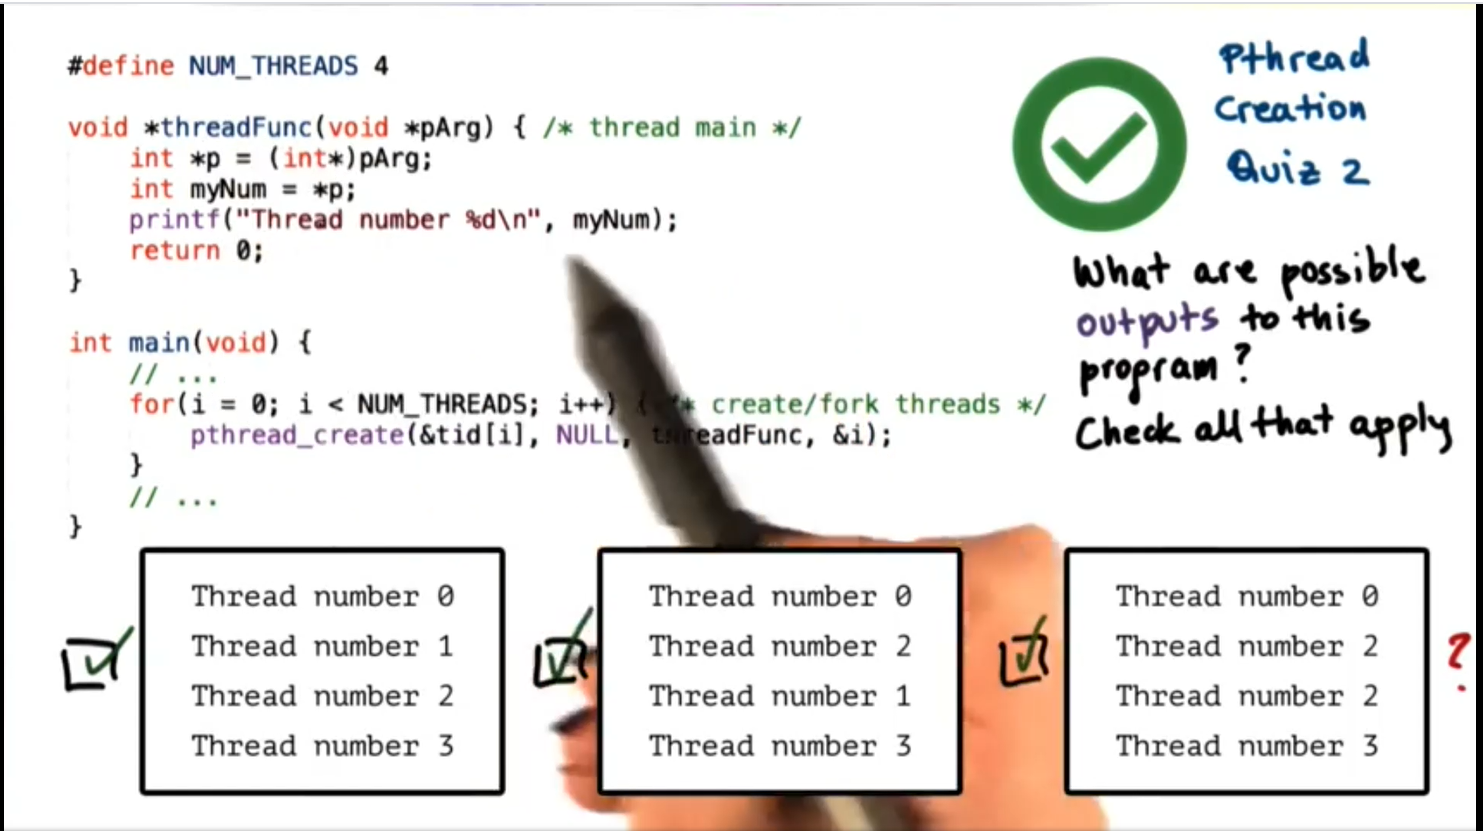

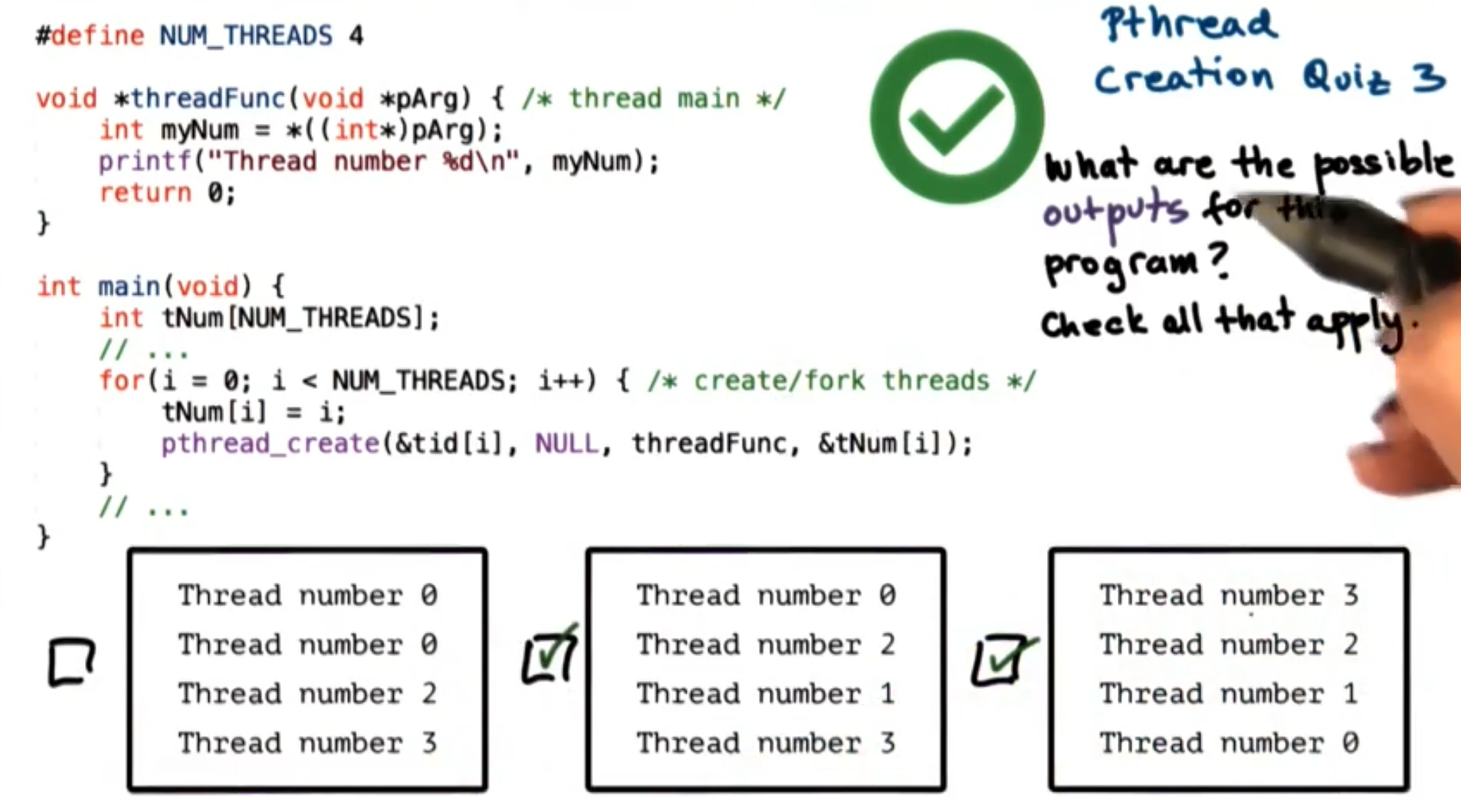

### Pthread Mutexes

to solve mutual exclusion problems among concurrent threads
Birrell's mechanisms:
1. mutex: pthread_mutex_t mutex;
1. lock(mutex): 
    1. int pthread_mutex_lock(pthread_mutex_t *mutex);
    1. int pthread_mutex_unlock(pthread_mutex_t *mutex);
    



In [ ]:
List<int> my_list;
pthread_mutex_t m;
viod safe insert(int i) {
    pthread_mutex_lock(m);
    my_list.insert(i);
    pthread_mutex_unlock(m);
}




In [ ]:
int pthread_mutex_init(pthraed_mutex_t *mutex, const phtread_mutexattr_t *attr);
//mutex attributes == specified mutex behavior when a mutex is shred among process. Default is visible only among the threads within their process. 

int pthread_mutex_trylock(pthread_mutex_t *mutex);
//check the mutex and will not block the calling thread if the mutex is locked.

int pthread_mutex_destroy(pthread_mutex_t *mutex);


Mutex safty tips:
1. shared data should always be accessed through a single mutx
1. mutex scope must be visible to all
1. globally order locks
    1. for all thread, lock mutexes in order
    1. always unlock a mutex
        1. always unlock the correct mutex
        

### Pthread condion variables:

Birrell's mechanisms:
1. Condition: pthread_cond_t aCond;
1. Wait: int pthread_cond_wait(pthread_cond_t *cond, pthread_mutex_t *mutex);
1. Signal: int pthread_cond_signal(pthread_cond_t *cond);
1. Brodadcast int pthread_cond_broadcast(pthread_cond_t *cond);

In [ ]:
pthread_cond_t aCond;
int pthread_cond_wait(pthread_cond_t *cond, pthread_mutex_t *mutex);
int pthread_cond_signal(pthread_cond_t *cond);
int pthread_cond_broadcast(pthread_cond_t *cond);
int pthread_cond_init(pthread_cond_t *cond, const pthread_condattr_t *attr);
int pthread_cond_destroy(pthread_cond_t *cond);

### Condition varaible safety tips

1. Don't forget to nofity waiting thread.
    1. predicte chagne -> signal/broadcast CORRECT condition varaible
1. When in doubt, broadcst, with performance loss
1. you don't need a mutex to signal/broadcast. 

### Producer/Consumer



In [ ]:
//chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://www.cc.gatech.edu/classes/AY2010/cs4210_fall/lectures/04-PthreadsIntro.pdf

#include<pthread.h>#include <stdio.h>

/* Producer/consumer program illustrating conditional variables */
/* Size of shared buffer */
#define BUF_SIZE 3
int buffer[BUF_SIZE];/*shared buffer */
int add=0;            /* place to add next element */
int rem=0;            /* place to remove next element */
int num=0;            /* number elements in buffer */
pthread_mutex_t m=PTHREAD_MUTEX_INITIALIZER; /* mutex lock for buffer */
pthread_cond_t c_cons=PTHREAD_COND_INITIALIZER; /* consumer waits on this cond var */
pthread_cond_t c_prod=PTHREAD_COND_INITIALIZER; /* producer waits on this cond var */
void *producer(void *param);
void *consumer(void *param);







In [ ]:
main (int argc, char *argv[]){
    pthread_t tid1, tid2;              /* thread identifiers */
    int i;/* create the threads; may be any number, in general */
    if (pthread_create(&tid1,NULL,producer,NULL) != 0) {
        fprintf (stderr, "Unable to create producer thread\n");
        exit (1);
    }
    
    if (pthread_create(&tid2,NULL,consumer,NULL) != 0) {
        fprintf (stderr, "Unable to create consumer thread\n");
        exit (1);}/* wait for created thread to exit */
    pthread_join(tid1,NULL);
    pthread_join(tid2,NULL);
    printf ("Parent quiting\n");
}


In [ ]:
/* Produce value(s) */
void *producer(void *param){
    int i;
    for (i=1; i<=20; i++) {/* Insert into buffer */
        pthread_mutex_lock (&m);
        if (num > BUF_SIZE) 
            exit(1);  /* overflow */
        while (num == BUF_SIZE)       /* block if buffer is full */
            pthread_cond_wait (&c_prod, &m);/* if executing here, buffer not full so add element */
        buffer[add] = i;
        add = (add+1) % BUF_SIZE;
        num++;
        pthread_mutex_unlock (&m);
        pthread_cond_signal (&c_cons);
        printf ("producer: inserted %d\n", i);  
        fflush (stdout);
    }
    printf ("producer quiting\n");  
    fflush (stdout);
}

In [ ]:
/* Consume value(s); Note the consumer never terminates */
void *consumer(void *param){
    int i;
    while (1) {
        pthread_mutex_lock (&m);
        if (num < 0) 
            exit(1);   /* underflow */
        while (num == 0)       /* block if buffer empty */
            pthread_cond_wait (&c_cons, &m);/* if executing here, buffer not empty so remove element */
        i = buffer[rem];
        rem = (rem+1) % BUF_SIZE;
        num--;pthread_mutex_unlock (&m);
        pthread_cond_signal (&c_prod);
        printf ("Consume value %d\n", i);  
        fflush(stdout);
    }
}